# Install the required packages

In [2]:
!cat /proc/meminfo

MemTotal:       13302916 kB
MemFree:         9825960 kB
MemAvailable:   12330096 kB
Buffers:           31896 kB
Cached:          2658004 kB
SwapCached:            0 kB
Active:           767652 kB
Inactive:        2512264 kB
Active(anon):     581188 kB
Inactive(anon):      416 kB
Active(file):     186464 kB
Inactive(file):  2511848 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               248 kB
Writeback:             0 kB
AnonPages:        590092 kB
Mapped:           123168 kB
Shmem:              1168 kB
KReclaimable:      94804 kB
Slab:             139216 kB
SReclaimable:      94804 kB
SUnreclaim:        44412 kB
KernelStack:        5648 kB
PageTables:         7660 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651456 kB
Committed_AS:    3937840 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8152 kB
VmallocChunk:          0 kB
Percpu:          

In [3]:
import cv2
import imageio
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import sys
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import imageio
import glob
import numpy as np

In [4]:
# Ref: https://www.geeksforgeeks.org/python-os-chdir-method/
# Ref: https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 
#os.chdir(r"C:\Users\Gfg\Desktop\geeks")
#print("Directory changed")

# This is the path where you want to search
#path = '/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/Datasets/manipulated_sequences/Deepfakes/raw/videos'

# this is the extension you want to detect
extension = '.jpg'

def get_list_filenames(cwd, path, extension):
    try:
        os.chdir(path)
        print("Successfully change the directory!")
        filenames = glob.glob('*.{}'.format(extension))
        print("Number of files: ", len(filenames))

    # Caching the exception
    except: 
        print("Something wrong with specified directory. Exception- ", sys.exc_info()) 

    # handling with finally: restore the path which is the current directory before changing directory           
    finally: 
        print("Restoring the path") 
        os.chdir(cwd) # Change it back to cwd (original directory)
        print("Current directory is-", os.getcwd()) 
        
    return filenames


# Ref: https://realpython.com/python-keras-text-classification/

# Get a list of dataframe after reading all csv files given a path
def get_all_image_files_read(path, filenames):
    list_img = []
    for file in filenames:
        img = imageio.imread(path+file)
        list_img.append(img)
    return list_img

# Deepfake
## Set the Deepfake Working Directory

In [5]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions


In [6]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)

Successfully change the directory!
Number of files:  6984
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions


In [7]:
print(filename[3393])
print(len(filename))

image_3380.jpg
6984


## Save Deepfake features in an array

In [8]:
fake = []
for i in range(len(filename)):
  fake.append(imageio.imread(filename[i]))
  print("Saving Img {} in an array".format(str(i)))
fake = np.array(fake)
print(fake.shape)

Streaming output truncated to the last 5000 lines.
Saving Img 1985 in an array
Saving Img 1986 in an array
Saving Img 1987 in an array
Saving Img 1988 in an array
Saving Img 1989 in an array
Saving Img 1990 in an array
Saving Img 1991 in an array
Saving Img 1992 in an array
Saving Img 1993 in an array
Saving Img 1994 in an array
Saving Img 1995 in an array
Saving Img 1996 in an array
Saving Img 1997 in an array
Saving Img 1998 in an array
Saving Img 1999 in an array
Saving Img 2000 in an array
Saving Img 2001 in an array
Saving Img 2002 in an array
Saving Img 2003 in an array
Saving Img 2004 in an array
Saving Img 2005 in an array
Saving Img 2006 in an array
Saving Img 2007 in an array
Saving Img 2008 in an array
Saving Img 2009 in an array
Saving Img 2010 in an array
Saving Img 2011 in an array
Saving Img 2012 in an array
Saving Img 2013 in an array
Saving Img 2014 in an array
Saving Img 2015 in an array
Saving Img 2016 in an array
Saving Img 2017 in an array
Saving Img 2018 in an arr

<class 'numpy.ndarray'>
(6984, 320, 320, 3)


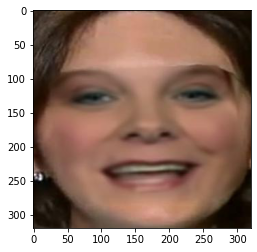

In [9]:
print(type(fake))
print(fake.shape)
plt.imshow(fake[6983])
# np.save("fake_3d", fake)

## Flatten $X_{fake}$

In [10]:
# flatten X
X_fake = []
for i in range(len(fake)):
  X_fake.append(np.ndarray.flatten(fake[i]))
X_fake = np.array(X_fake)
print(X_fake.shape)
#print(type(X_fake))

# Label y
#y = np.zeros(shape=(10, 1))
#print(y.shape)

(6984, 307200)


# Label "fake" as $Y$ features

In [11]:
np_data = []
for i in range(len(X_fake)):
  np_data.append((X_fake[i], "fake"))
print(np_data)

[(array([133, 130, 115, ...,  71,  59,  71], dtype=uint8), 'fake'), (array([117, 113, 112, ...,  43,  31,  45], dtype=uint8), 'fake'), (array([137, 131, 115, ...,  81,  63,  75], dtype=uint8), 'fake'), (array([97, 92, 86, ..., 39, 31, 46], dtype=uint8), 'fake'), (array([37, 35, 14, ..., 73, 65, 44], dtype=uint8), 'fake'), (array([84, 82, 61, ..., 99, 80, 65], dtype=uint8), 'fake'), (array([32, 29, 10, ..., 90, 69, 50], dtype=uint8), 'fake'), (array([ 49,  40,  25, ..., 111, 105,  73], dtype=uint8), 'fake'), (array([86, 81, 61, ..., 97, 74, 60], dtype=uint8), 'fake'), (array([94, 87, 68, ..., 96, 83, 64], dtype=uint8), 'fake'), (array([ 99,  93,  71, ..., 117, 100,  70], dtype=uint8), 'fake'), (array([ 42,  45,  28, ..., 166, 173, 189], dtype=uint8), 'fake'), (array([27, 24, 17, ..., 39, 44, 37], dtype=uint8), 'fake'), (array([29, 22, 16, ..., 54, 44, 43], dtype=uint8), 'fake'), (array([28, 21, 15, ..., 49, 44, 40], dtype=uint8), 'fake'), (array([26, 26, 18, ..., 31, 21, 29], dtype=uint

In [12]:
"""
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
"""

'\nX = []\ny = []\nfor i in data:\n  X.append(i[0])\n  y.append(i[1])\nprint(len(X))\nprint(len(y))\n'

# Real
## Set the Real Working Directory

In [13]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions


In [14]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)

Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions


In [15]:
print(filename[6999])
print(len(filename))

image_999.jpg
7000


## Save Real features in an array

In [16]:
real = []
for i in range(len(filename)):
  real.append(imageio.imread(filename[i]))
  print("Saving Img {} in an array".format(str(i)))
real = np.array(real)
print(real.shape)

Streaming output truncated to the last 5000 lines.
Saving Img 2001 in an array
Saving Img 2002 in an array
Saving Img 2003 in an array
Saving Img 2004 in an array
Saving Img 2005 in an array
Saving Img 2006 in an array
Saving Img 2007 in an array
Saving Img 2008 in an array
Saving Img 2009 in an array
Saving Img 2010 in an array
Saving Img 2011 in an array
Saving Img 2012 in an array
Saving Img 2013 in an array
Saving Img 2014 in an array
Saving Img 2015 in an array
Saving Img 2016 in an array
Saving Img 2017 in an array
Saving Img 2018 in an array
Saving Img 2019 in an array
Saving Img 2020 in an array
Saving Img 2021 in an array
Saving Img 2022 in an array
Saving Img 2023 in an array
Saving Img 2024 in an array
Saving Img 2025 in an array
Saving Img 2026 in an array
Saving Img 2027 in an array
Saving Img 2028 in an array
Saving Img 2029 in an array
Saving Img 2030 in an array
Saving Img 2031 in an array
Saving Img 2032 in an array
Saving Img 2033 in an array
Saving Img 2034 in an arr

<class 'numpy.ndarray'>
(7000, 320, 320, 3)


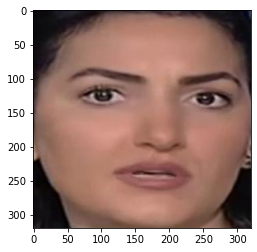

In [17]:
print(type(real))
print(real.shape)
plt.imshow(real[6983])
# np.save("fake_3d", fake)

## Flatten $X_{real}$

In [18]:
# flatten X
X_real = []
for i in range(len(real)):
  X_real.append(np.ndarray.flatten(real[i]))
X_real = np.array(X_real)
print(X_real.shape)
#print(type(X_fake))

# Label y
#y = np.zeros(shape=(len(filename), 1))
#print(y.shape)

(7000, 307200)


# Label "real" as $Y$ features

In [19]:
for i in range(len(X_real)):
  # use the data [] that we have saved the result from "fake" session
  np_data.append((X_real[i], "real"))
print(np_data[-1])

(array([174, 140, 102, ...,  23,  39,  98], dtype=uint8), 'real')


# Save the Data

In [ ]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
!pwd
np_data = np.array(np_data, dtype=object)
#np.savez_compressed("np_data.npz", np_data)
np.save("np_data.npy", np_data)

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data


# Define the $X$ and $y$

In [18]:
X = []
y = []
for i in np_data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
print("The length should be " + str(6984+7000))

13984
13984
The length should be 13984


# References
- https://www.geeksforgeeks.org/python-os-chdir-method/
- https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 
- https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/

# Testing Zone

In [ ]:
# Program to concatenate two 2D arrays column-wise
# import numpy
import numpy as np
 
# Creating two 2D arrays
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(10,19).reshape(3,3)
arr1
arr2
 
# Concatenating operation
# axis = 1 implies that it is being done column-wise
np.concatenate((arr1,arr2),axis=1)

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

In [ ]:
import numpy as np
  
# creating a numpy array
array = np.array([['a', 'b', 'c'],
                  ['d', 'e', 'f'],
                  ['g', 'h', 'i']])
  
# convert nympy array to dictionary
d = dict(enumerate(array.flatten(), 1))
  
# print numpy array
print(array)
print(type(array))
  
# print dictionary
print(d)
print(type(d))

[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']]
<class 'numpy.ndarray'>
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i'}
<class 'dict'>
